# Analysing The Climate Data

In [42]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import os
import matplotlib.pyplot as plt

In [3]:
# Get the current working directory
cwd = os.getcwd()
# List all files in the directory and filter for .csv files
csv_files = [f for f in os.listdir(cwd) if os.path.isfile(os.path.join(cwd, f)) and f.endswith('.csv')]
print(csv_files)

['Climate_aet_.csv', 'Climate_def_.csv', 'Climate_pdsi_.csv', 'Climate_pet_.csv', 'Climate_pr_.csv', 'Climate_ro_.csv', 'Climate_soil_.csv', 'Climate_srad_.csv', 'Climate_swe_.csv', 'Climate_tmmn_.csv', 'Climate_tmmx_.csv', 'Climate_vap_.csv', 'Climate_vpd_.csv', 'Climate_vs_.csv']


1362

In [40]:
dates = ['20150101', '20150201', '20150301', '20150401',
         '20150501', '20150601', '20150701', '20150801',
         '20150901', '20151001', '20151101', '20151201']

feature_names = [x.split('_')[1] for x in csv_files]
feature_names

['aet',
 'def',
 'pdsi',
 'pet',
 'pr',
 'ro',
 'soil',
 'srad',
 'swe',
 'tmmn',
 'tmmx',
 'vap',
 'vpd',
 'vs']

In [53]:
# random number between 0 and 1660
random_number = np.random.randint(0, 1686)
print("Random number: ", random_number)
df = pd.read_csv(csv_files[0])
random_row = df.iloc[random_number]
PID = random_row['Point_ID']
print("Point ID: ", PID)

Random number:  1138
Point ID:  44163306


In [54]:
rows = []
for csv_file in csv_files:
    df = pd.read_csv(csv_file)
    df = df[df['Point_ID'] == PID]
    df = df.iloc[:, 1:13]
    rows.append(df.values[0])

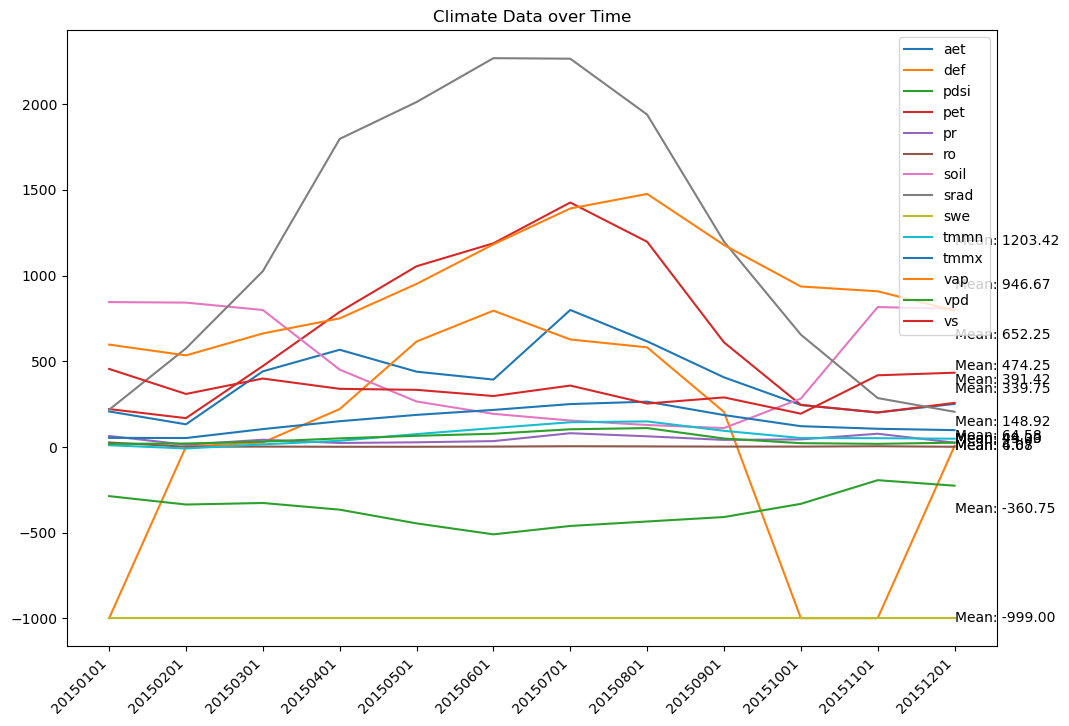

In [62]:
plt.figure(figsize=(12, 8))
# Plot the data
for i, arr in enumerate(rows):
    plt.plot(dates, arr, label=feature_names[i])
    # Calculate and add the mean value label
    mean_val = np.mean(arr)
    plt.text(dates[-1], mean_val, f"Mean: {mean_val:.2f}", va='center', ha='left', color='black')

# Set the plot title and legend
plt.title('Climate Data over Time')
plt.legend(loc='upper right')
plt.xticks(dates, rotation=45, ha='right')
# Show the plot
plt.show()